# Patients No Show Appointment May 2015

<h3>import Necessery library<h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To Know the data shape and number of column and number of rows

In [3]:
df.shape

(110527, 14)

In [4]:
df.duplicated().sum()

0

There is no Duplicated data

In [5]:
df['PatientId'].nunique()

62299

There duplicated data in column of PatientId

In [6]:
df['PatientId'].duplicated().sum()

48228

To Check there is duplicated in PatientId column

In [7]:
df.duplicated(['PatientId','No-show']).sum()

38710

To Check there is duplicated in PatientId and No Show column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


To check is missing value or not

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


when make describe for data i found the mean is 37 and min is -1 and this error in data and max is 115 then have outlier

In [10]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


This is row have a wrong data and we will remove this column and we can not to remove it becounse doesn't effect to data becouse is one row

# Data Cleaning

In [11]:
df.drop(index=99832,inplace=True)

drop the column that have a min age = -1 

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Show data after drop the row

In [13]:
df.rename(columns={
    'Hipertension' : 'Hypertension',
    'No-show' : 'No_Show'
},inplace=True)

Change and the correct the name of Columns

In [14]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df.drop_duplicates(subset=['PatientId','No_Show'],inplace=True)

remove all repeated data in PatientId column and No_Show 

In [16]:
df.shape

(71816, 14)

show the number of rows and columns after drop

In [17]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], inplace=True,axis=1)

drop the unless column that i don't use

In [18]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Anlaysis

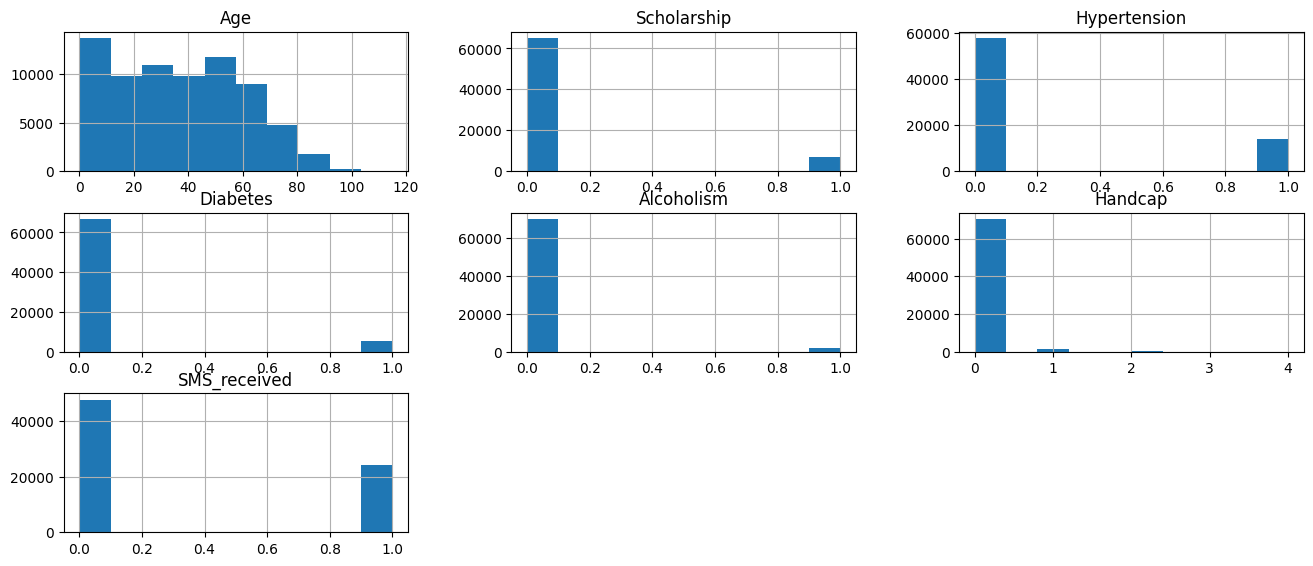

In [19]:
df.hist(figsize=(16,6.5))
plt.show()

In [20]:
df['No_Show'].value_counts()

No_Show
No     54153
Yes    17663
Name: count, dtype: int64

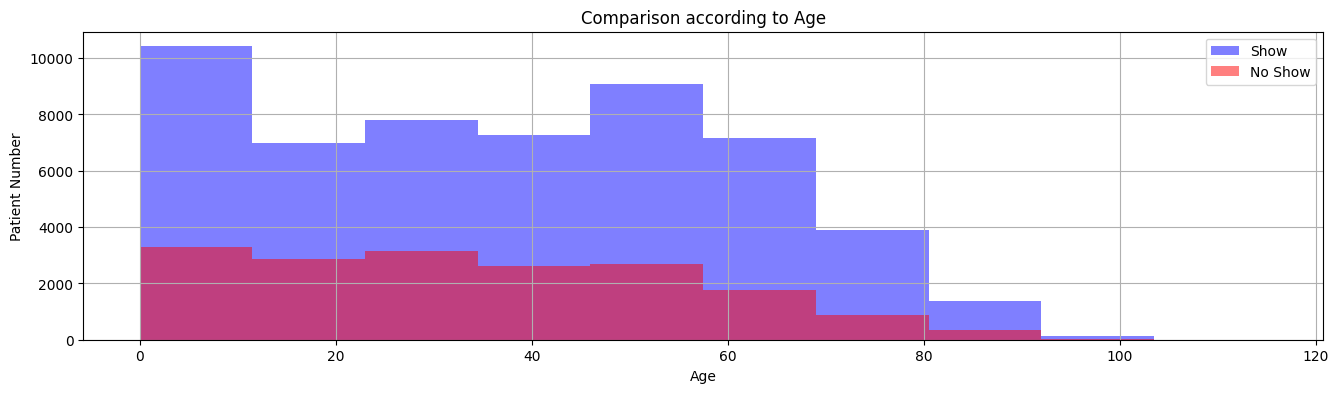

In [21]:
# Question does age affect the attendence
def attendance(df, columnname, attend, absent):
    plt.figure(figsize=(16, 4))
    df[df['No_Show'] == attend][columnname].hist(alpha=0.5, bins=10, color='blue', label='Show')
    df[df['No_Show'] == absent][columnname].hist(alpha=0.5, bins=10, color='red', label='No Show')
    plt.legend()
    plt.title('Comparison according to ' + columnname)
    plt.xlabel(columnname)
    plt.ylabel('Patient Number')

attendance(df, 'Age', 'No', 'Yes')

in the graph appear the data is the most from 0 to 8 and then from 45 to 55 and least from 65 to upove 

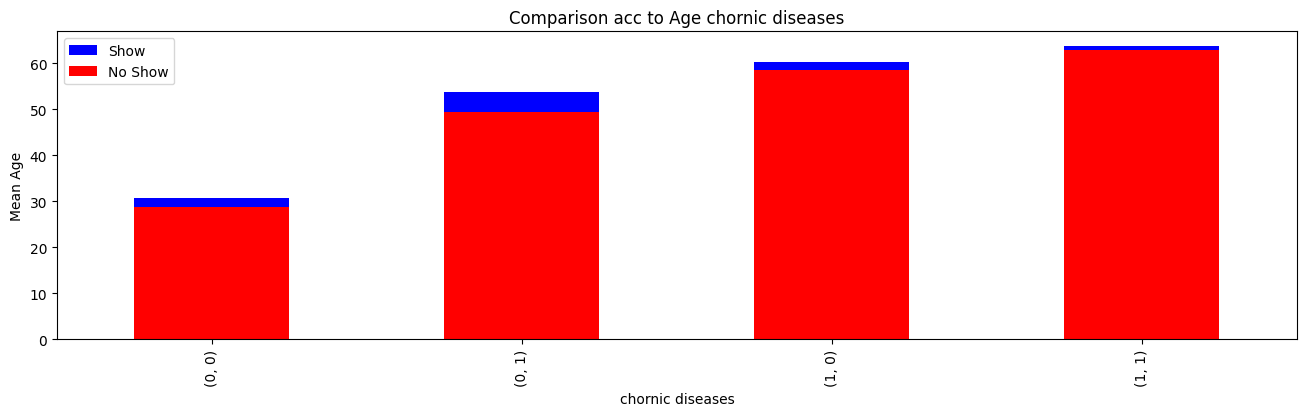

In [22]:
# does age and chornic diseases affect the attendence together
plt.figure(figsize=(16,4))
df[df['No_Show'] == 'No'].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind='bar',color = 'blue',label = 'Show')
df[df['No_Show'] == 'Yes'].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind='bar',color = 'red',label = 'No Show')
plt.legend()
plt.title('Comparison acc to Age chornic diseases')
plt.xlabel('chornic diseases')
plt.ylabel('Mean Age')
plt.show()

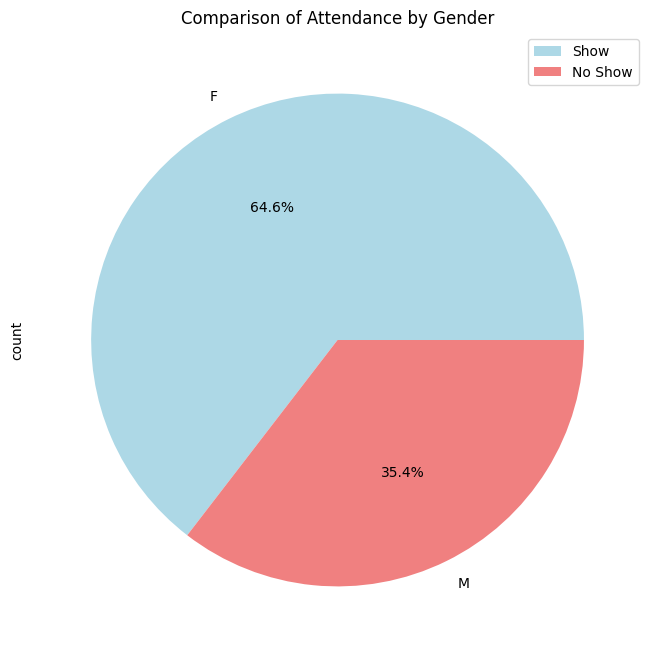

In [23]:
# does gender effect to attendence
def attendance(df, columnname, attend, absent):
    plt.figure(figsize=(16, 8))
    df[df['No_Show'] == attend][columnname].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title('Comparison of Attendance by Gender')
    plt.legend(labels=['Show', 'No Show'], loc='upper right')

attendance(df, 'Gender', 'No', 'Yes')
plt.show()

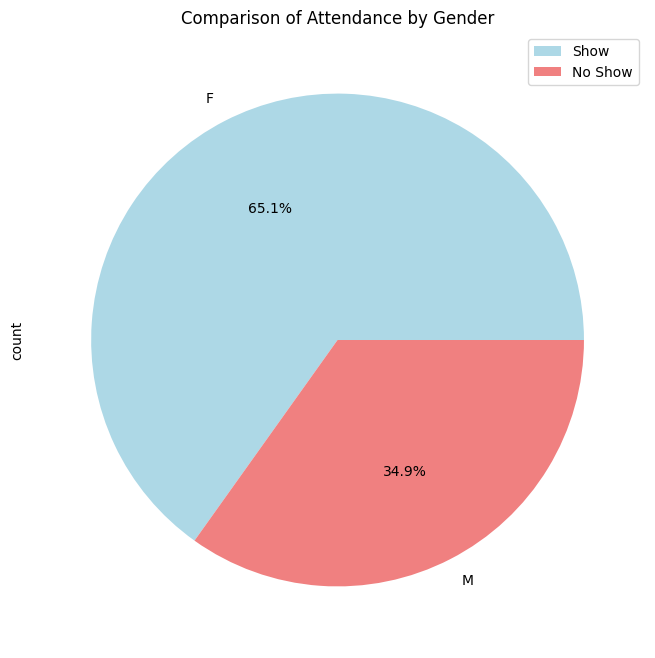

In [24]:
def attendance(df, columnname, attend, absent):
    plt.figure(figsize=(16, 8))
    df[df['No_Show'] == absent][columnname].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title('Comparison of Attendance by Gender')
    plt.legend(labels=['Show', 'No Show'], loc='upper right')

attendance(df, 'Gender', 'No', 'Yes')
plt.show()

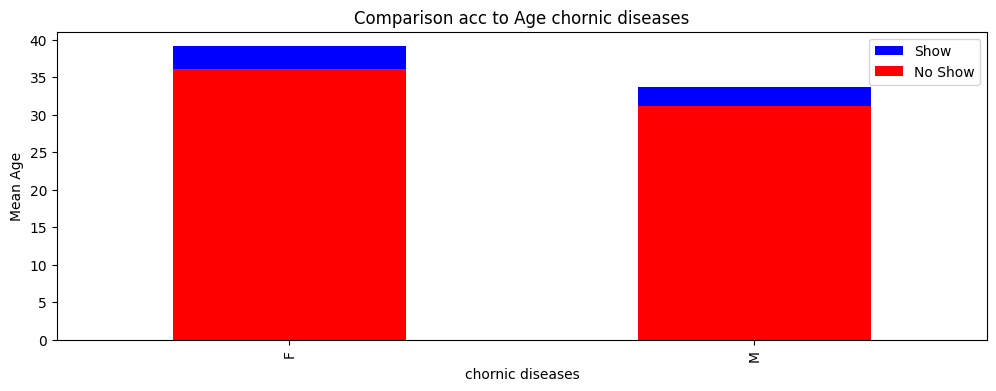

In [25]:
# does age and chornic diseases affect the attendence together by gender mean age
plt.figure(figsize=(12,4))
df[df['No_Show'] == 'No'].groupby('Gender')['Age'].mean().plot(kind='bar',color = 'blue',label = 'Show')
df[df['No_Show'] == 'Yes'].groupby('Gender')['Age'].mean().plot(kind='bar',color = 'red',label = 'No Show')
plt.legend()
plt.title('Comparison acc to Age chornic diseases')
plt.xlabel('chornic diseases')
plt.ylabel('Mean Age')
plt.show()

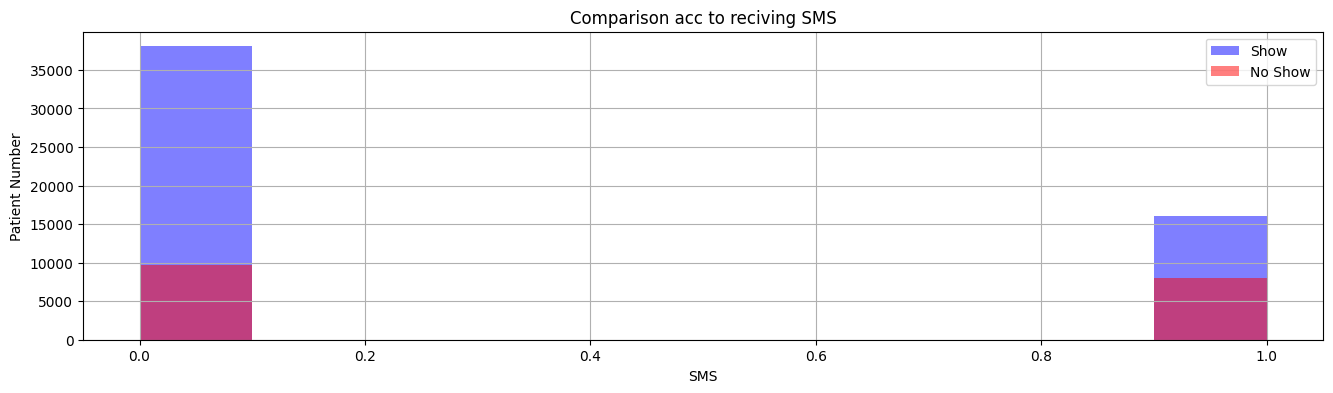

In [26]:
# Question does Receiving SMS affect the attendence
def attendance(df, columnname, attend, absent):
    plt.figure(figsize=(16, 4))
    df[df['No_Show'] == attend][columnname].hist(alpha=0.5, bins=10, color='blue', label='Show')
    df[df['No_Show'] == absent][columnname].hist(alpha=0.5, bins=10, color='red', label='No Show')
    plt.legend()
    plt.title('Comparison acc to reciving SMS')
    plt.xlabel('SMS')
    plt.ylabel('Patient Number')

attendance(df, 'SMS_received', 'No', 'Yes')

Number of showing without SMS is greater than from No Showing

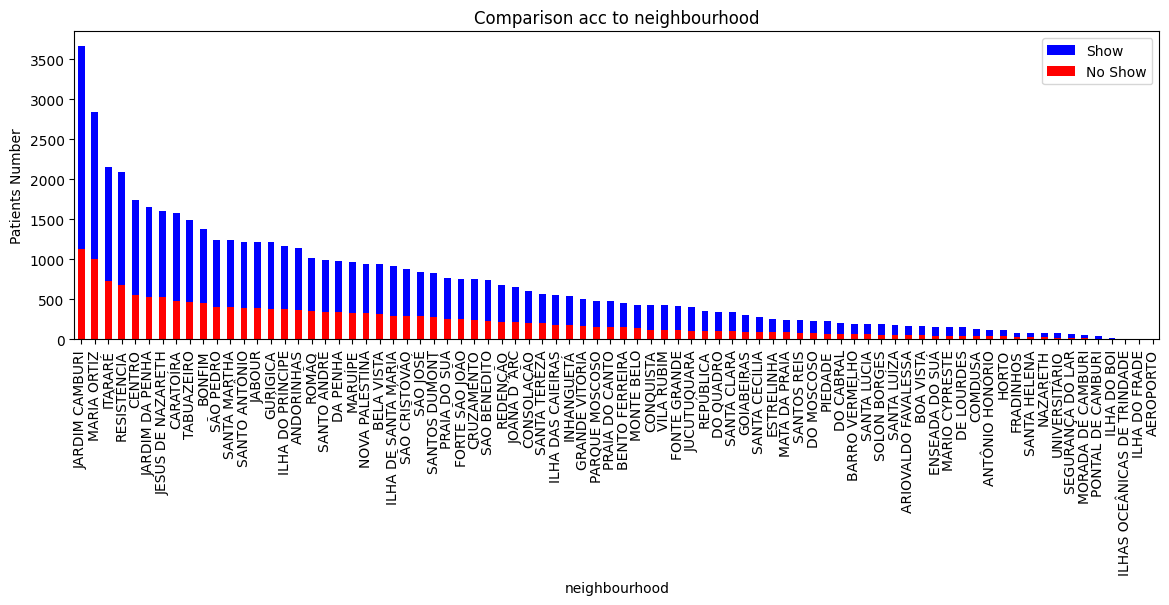

In [27]:
# does neighbourhood affect to attendence or not 
plt.figure(figsize=(14,4))
df['Neighbourhood'][df['No_Show'] == 'No'].value_counts().plot(kind='bar',color = 'blue',label = 'Show')
df['Neighbourhood'][df['No_Show'] == 'Yes'].value_counts().plot(kind='bar',color = 'red',label = 'No Show')
plt.legend()
plt.title('Comparison acc to neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Patients Number')
plt.show()

neighbourhood has a greater effect to attend

# Conclusions
Neighbourhood has a greet effect on attendence or not, Jardim and camburi has the greatest number of patient and also the greatest showing rate.
number of showing pattients from specific neighbourhood sms and ages.
the age from 0 to 8 the most showing and 45 to 55 least attend
number of showing patients without receiving sms is greater than showing patients with receiving sms